In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("house_Data.csv")
df1.head(2)


,ID,locality,zipcode,Building condition,Price,Kitchen type,Living area,Furnished,Surface of the plot,Number of frontages,Swimming pool,Bedrooms,Garden,Garden surface,Terrace,Terrace surface,Type of property
0,10318725,evere,1140,Good,499000,USA hyper equipped,155,TRUE,177,2,True,3,FALSE,0,TRUE,27,House
1,10319750,waterloo,1410,Good,620000,Hyper equipped,155,TRUE,532,4,True,3,TRUE,210,TRUE,40,House


Step 1 : Data Cleaning

In [5]:
# No duplicates
df1.drop_duplicates()
#detleted 'square meters' from Living area, Surface of the plot, Garden surface. Terrace surface.
df1['Living area'] = df1['Living area'].str.replace('m² square meters', '')
df1['Surface of the plot'] = df1['Surface of the plot'].str.replace('m² square meters', '')
df1['Garden surface'] = df1['Garden surface'].str.replace('m² square meters', '')
df1['Terrace surface'] = df1['Terrace surface'].str.replace('m² square meters', '')
df1['Living area'] = df1['Living area'].str.replace('m² square meter', '')
df1['Surface of the plot'] = df1['Surface of the plot'].str.replace('m² square meter', '')
df1['Garden surface'] = df1['Garden surface'].str.replace('m² square meter', '')
df1['Terrace surface'] = df1['Terrace surface'].str.replace('m² square meter', '')
df1['Furnished'] = df1['Furnished'].astype('bool')
df1['Swimming pool'] = df1['Swimming pool'].astype('bool')
df1['Terrace'] = df1['Terrace'].astype('bool')
df1['Furnished'] = df1['Furnished'].astype('bool')

df1.head()


,ID,locality,zipcode,Building condition,Price,Kitchen type,Living area,Furnished,Surface of the plot,Number of frontages,Swimming pool,Bedrooms,Garden,Garden surface,Terrace,Terrace surface,Type of property
0,10318725,evere,1140,Good,499000,USA hyper equipped,155,True,177,2,True,3,FALSE,0,True,27,House
1,10319750,waterloo,1410,Good,620000,Hyper equipped,155,True,532,4,True,3,TRUE,210,True,40,House
2,10319842,waterloo,1410,Good,645000,Installed,190,True,944,4,True,4,TRUE,450,True,25,House
3,10320082,herselt,2230,Good,720000,Installed,320,True,5209,4,True,4,FALSE,0,True,0,House
4,10320081,herselt,2230,Good,720000,Installed,320,True,5209,4,True,4,FALSE,0,True,0,House


In [6]:
from skimpy import clean_columns
df1 = clean_columns(df1)
df1

15 column names have been cleaned

,id,locality,zipcode,building_condition,price,kitchen_type,living_area,furnished,surface_of_the_plot,number_of_frontages,swimming_pool,bedrooms,garden,garden_surface,terrace,terrace_surface,type_of_property
0,10318725,evere,1140,Good,499000,USA hyper equipped,155,True,177,2,True,3,FALSE,0,True,27,House
1,10319750,waterloo,1410,Good,620000,Hyper equipped,155,True,532,4,True,3,TRUE,210,True,40,House
2,10319842,waterloo,1410,Good,645000,Installed,190,True,944,4,True,4,TRUE,450,True,25,House
3,10320082,herselt,2230,Good,720000,Installed,320,True,5209,4,True,4,FALSE,0,True,0,House
4,10320081,herselt,2230,Good,720000,Installed,320,True,5209,4,True,4,FALSE,0,True,0,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,10337222,gembloux,5030,TRUE,279000,Installed,84,True,0,2,False,2,None,0,True,6,Apartment
3451,10337208,petit-han,6940,TRUE,299000,Installed,260,True,657,2,False,4,Yes,0,True,0,House
3452,10337204,forest,1190,TRUE,179000,Semi equipped,65,True,0,2,False,1,None,0,True,0,Apartment
3453,10208175,anderlecht,1070,FALSE,349000,Semi equipped,150,True,0,0,False,4,Yes,75,True,0,House


In [13]:
df1.shape

(3455, 17)

In [14]:
df1.dtypes

id                      int64
locality               object
zipcode                 int64
building_condition     object
price                   int64
kitchen_type           object
living_area            object
furnished                bool
surface_of_the_plot    object
number_of_frontages     int64
swimming_pool            bool
bedrooms                int64
garden                 object
garden_surface         object
terrace                  bool
terrace_surface        object
type_of_property       object
dtype: object

Step 2 : Data Analysis

In [15]:
df1.shape

(3455, 17)

In [16]:
df1.corr()

C:\Users\sheet\AppData\Local\Temp\ipykernel_24600\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,id,zipcode,price,furnished,number_of_frontages,swimming_pool,bedrooms,terrace
id,1.000000,0.051155,-0.034741,NaN,0.025443,-0.047631,0.007676,NaN
zipcode,0.051155,1.000000,-0.125879,NaN,-0.111860,-0.013985,-0.108042,NaN
price,-0.034741,-0.125879,1.000000,NaN,0.267591,0.049742,0.424059,NaN
furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_frontages,0.025443,-0.111860,0.267591,NaN,1.000000,0.053788,0.356740,NaN
swimming_pool,-0.047631,-0.013985,0.049742,NaN,0.053788,1.000000,0.088384,NaN
bedrooms,0.007676,-0.108042,0.424059,NaN,0.356740,0.088384,1.000000,NaN
terrace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: ylabel='Frequency'>

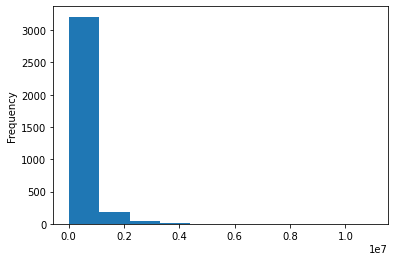

In [18]:

df1['price'].plot.hist()


<AxesSubplot: xlabel='zipcode', ylabel='price'>

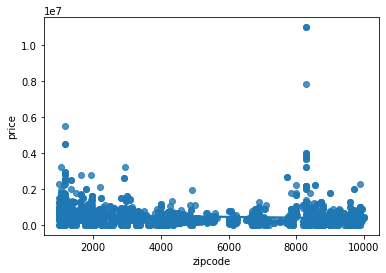

In [23]:
sns.regplot(data=df1, x="zipcode", y="price" )


Step 2 : Data Analysis

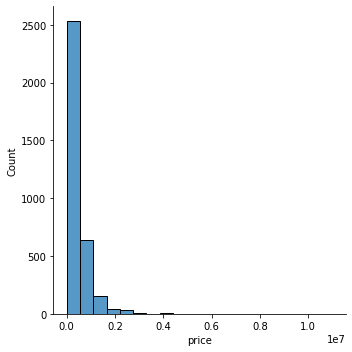

In [13]:
sns.displot(df1['price'], bins=20)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Data Analysis

Now that the data has been collected and cleaned, it is time for the analysis. How many variables and inputs do you have? And so on...

Use the tools such as matplotlib / seaborn / plotly. Take the time to play with those libraries before starting.

Answer the Folllowing questions with a vizualization if appropriate:

How many rows and columns?
What is the correlation between the variables and the price? (Why might that be?)
How are variables correlated to each other? (Why?)
Which variables have the greatest influence on the price?
Which variables have the least influence on the price?
How many qualitative and quantitative variables are there? How would you transform these values into numerical values?
What is the percentage of missing values per column?

Question1: How many rows and columns?

In [15]:

print("number of columns1 : ", df1.shape[1])
print("number of row : ", df1.shape[0])



number of columns1 :  17
number of row :  3417


Question 2: What is the correlation between the variables and the price? (Why might that be?)

In [16]:
correlation_price = df1.corr().round(2)
correlation_price['price']

C:\Users\sheet\AppData\Local\Temp\ipykernel_9940\3210170728.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_price = df1.corr().round(2)


id                    -0.03
zipcode               -0.13
price                  1.00
living_area            0.61
furnished               NaN
surface_of_the_plot    0.24
number_of_frontages    0.26
swimming_pool           NaN
bedrooms               0.42
garden_surface         0.12
terrace                 NaN
terrace_surface        0.16
Name: price, dtype: float64

Which variables have the greatest influence on the price?

In [17]:
correlation_price = df1.corr().round(2)
correlation_price['price'].sort_values(ascending=False)

C:\Users\sheet\AppData\Local\Temp\ipykernel_9940\1879074841.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_price = df1.corr().round(2)


price                  1.00
living_area            0.61
bedrooms               0.42
number_of_frontages    0.26
surface_of_the_plot    0.24
terrace_surface        0.16
garden_surface         0.12
id                    -0.03
zipcode               -0.13
furnished               NaN
swimming_pool           NaN
terrace                 NaN
Name: price, dtype: float64

Which variables have the least influence on the price?

In [18]:
corr_price_least_influence = df1.corr().round(2)
corr_price_least_influence['price'].sort_values(ascending=True)

C:\Users\sheet\AppData\Local\Temp\ipykernel_9940\796909613.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_price_least_influence = df1.corr().round(2)


zipcode               -0.13
id                    -0.03
garden_surface         0.12
terrace_surface        0.16
surface_of_the_plot    0.24
number_of_frontages    0.26
bedrooms               0.42
living_area            0.61
price                  1.00
furnished               NaN
swimming_pool           NaN
terrace                 NaN
Name: price, dtype: float64

How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

In [19]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   3417 non-null   int64 
 1   locality             3417 non-null   object
 2   zipcode              3417 non-null   int64 
 3   building_condition   2966 non-null   object
 4   price                3417 non-null   int64 
 5   kitchen_type         3417 non-null   object
 6   living_area          3417 non-null   int64 
 7   furnished            3417 non-null   bool  
 8   surface_of_the_plot  3417 non-null   int64 
 9   number_of_frontages  3417 non-null   int64 
 10  swimming_pool        3417 non-null   bool  
 11  bedrooms             3417 non-null   int64 
 12  garden               3417 non-null   object
 13  garden_surface       3417 non-null   int64 
 14  terrace              3417 non-null   bool  
 15  terrace_surface      3417 non-null   int64 
 16  type_o

What is the percentage of missing values per column?

In [20]:
df1.isnull().sum()

id                       0
locality                 0
zipcode                  0
building_condition     451
price                    0
kitchen_type             0
living_area              0
furnished                0
surface_of_the_plot      0
number_of_frontages      0
swimming_pool            0
bedrooms                 0
garden                   0
garden_surface           0
terrace                  0
terrace_surface          0
type_of_property         0
dtype: int64

Data Interpretation:

Plot the outliers.

In [21]:
df1.price.describe().round(2)

count        3417.00
mean       482623.76
std        535598.12
min             0.00
25%        240000.00
50%        359000.00
75%        560000.00
max      11000000.00
Name: price, dtype: float64

In [22]:
df1.price.median()

359000.0

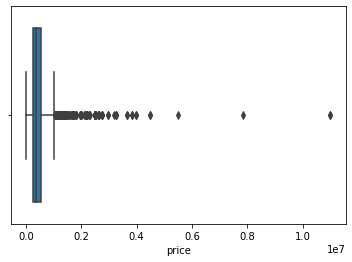

In [23]:
import seaborn as sns
sns.boxplot(data=df1, x='price', showfliers=True);

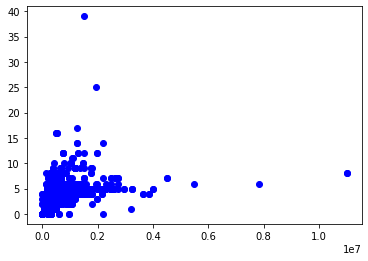

In [26]:
import matplotlib.pyplot as plt

plt.scatter(df1['price'],df1['bedrooms'], color='b')
plt.show()

Represent the number of properties according to their surface using a histograms

Text(0.5, 0, 'Living Area')

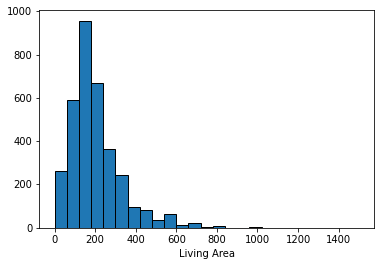

In [27]:
import matplotlib.pyplot as plt

plt.hist(df1["living_area"], bins=25, edgecolor="black")
plt.xlabel('Living Area')

What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)

In [28]:
df1.groupby('zipcode')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
1000,25.0,7.537600e+05,459860.602067,280000.0,425000.0,685000.0,955000.0,2295000.0
1020,19.0,5.745789e+05,168959.993881,350000.0,484000.0,540000.0,595000.0,980000.0
1030,22.0,6.015909e+05,321554.951105,295000.0,433750.0,499500.0,618750.0,1495000.0
1040,12.0,9.152500e+05,225754.039529,600000.0,789000.0,866250.0,1005000.0,1350000.0
1050,27.0,1.118074e+06,598301.501427,510000.0,650000.0,1000000.0,1395000.0,3200000.0
...,...,...,...,...,...,...,...,...
9930,2.0,2.490000e+05,0.000000,249000.0,249000.0,249000.0,249000.0,249000.0
9940,3.0,6.916667e+05,352183.664206,285000.0,590000.0,895000.0,895000.0,895000.0
9960,2.0,4.650000e+05,0.000000,465000.0,465000.0,465000.0,465000.0,465000.0


In [29]:
df1.corr().round(2)

C:\Users\sheet\AppData\Local\Temp\ipykernel_9940\1440075714.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr().round(2)


,id,zipcode,price,living_area,furnished,surface_of_the_plot,number_of_frontages,swimming_pool,bedrooms,garden_surface,terrace,terrace_surface
id,1.00,0.05,-0.03,0.01,NaN,-0.03,0.03,NaN,0.01,-0.00,NaN,0.01
zipcode,0.05,1.00,-0.13,-0.03,NaN,0.02,-0.12,NaN,-0.11,-0.03,NaN,-0.11
price,-0.03,-0.13,1.00,0.61,NaN,0.24,0.26,NaN,0.42,0.12,NaN,0.16
living_area,0.01,-0.03,0.61,1.00,NaN,0.35,0.32,NaN,0.69,0.17,NaN,0.17
furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
surface_of_the_plot,-0.03,0.02,0.24,0.35,NaN,1.00,0.27,NaN,0.19,0.40,NaN,0.17
number_of_frontages,0.03,-0.12,0.26,0.32,NaN,0.27,1.00,NaN,0.35,0.18,NaN,0.19
swimming_pool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.01,-0.11,0.42,0.69,NaN,0.19,0.35,NaN,1.00,0.17,NaN,0.17
garden_surface,-0.00,-0.03,0.12,0.17,NaN,0.40,0.18,NaN,0.17,1.00,NaN,0.22


In [30]:
df1.describe()

,id,zipcode,price,living_area,surface_of_the_plot,number_of_frontages,bedrooms,garden_surface,terrace_surface
count,3.417000e+03,3417.000000,3.417000e+03,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000
mean,1.022313e+07,4557.676032,4.826238e+05,201.381914,845.830553,2.466491,3.412350,220.700907,13.482587
std,2.076685e+05,3015.331988,5.355981e+05,140.235444,2503.554727,1.306444,1.942228,1044.143827,26.658913
min,5.750433e+06,1000.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.019403e+07,1702.000000,2.400000e+05,120.000000,125.000000,2.000000,2.000000,0.000000,0.000000
50%,1.028989e+07,4052.000000,3.590000e+05,171.000000,302.000000,2.000000,3.000000,0.000000,0.000000
75%,1.032574e+07,7711.000000,5.600000e+05,250.000000,808.000000,4.000000,4.000000,122.000000,20.000000
max,1.033436e+07,9991.000000,1.100000e+07,1500.000000,57392.000000,4.000000,39.000000,42500.000000,396.000000


Data Visualization

In [31]:
df1

,id,locality,zipcode,building_condition,price,kitchen_type,living_area,furnished,surface_of_the_plot,number_of_frontages,swimming_pool,bedrooms,garden,garden_surface,terrace,terrace_surface,type_of_property
0,10318725,evere,1140,Good,499000,USA hyper equipped,155,True,177,2,True,3,FALSE,0,True,27,House
1,10319750,waterloo,1410,Good,620000,Hyper equipped,155,True,532,4,True,3,TRUE,210,True,40,House
2,10319842,waterloo,1410,Good,645000,Installed,190,True,944,4,True,4,TRUE,450,True,25,House
3,10320082,herselt,2230,Good,720000,Installed,320,True,5209,4,True,4,FALSE,0,True,0,House
4,10320081,herselt,2230,Good,720000,Installed,320,True,5209,4,True,4,FALSE,0,True,0,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,10334348,gent,9000,NaN,360000,Semi equipped,97,True,694,2,True,1,None,0,True,0,House
3413,10334345,ougree,4102,NaN,67000,None,92,True,100,0,True,2,None,0,True,0,House
3414,10334341,ans,4430,Good,174900,Semi equipped,73,True,0,2,True,2,None,0,True,3,Apartment
3415,10334340,nechin,7730,Good,209000,Installed,130,True,205,2,True,3,None,0,True,40,House


Text(0.5, 1.0, 'impact of price as per locality')

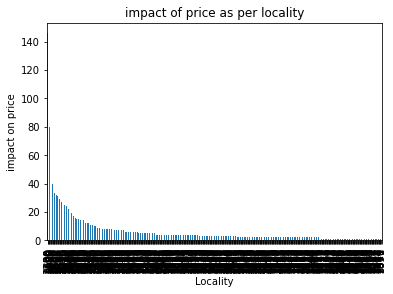

In [32]:
df1['zipcode'].value_counts().plot(kind='bar')
plt.xlabel('Locality')
plt.ylabel('impact on price')
plt.title('impact of price as per locality')